# Linear Regression

필요한 파이썬 라이브러리

In [ ]:
import numpy as np # 벡터 및 행렬 연산을 위함
import pandas as pd # 데이터 분석에 활용됨
import matplotlib.pyplot as plt # 그래프를 그리기 위함

#브라우저 내부에 바로 그래프가 그려지도록 함
%matplotlib inline  

from mpl_toolkits.mplot3d import Axes3D # 3차원 공간에 그래프 그리기 위함

Text(0.5, 0, 'z')

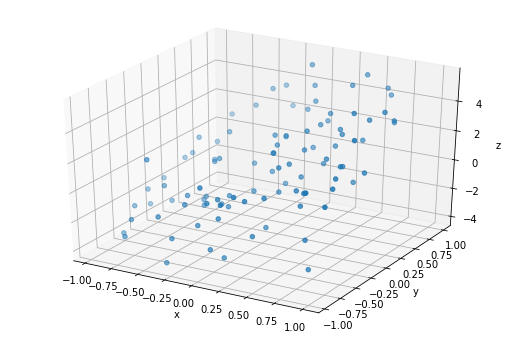

In [ ]:
import random
random.seed(777)
#data generation 
x = np.random.uniform(-1, 1, 100).reshape(-1, 1)
y = np.random.uniform(-1, 1, 100).reshape(-1, 1)
z = 2*x + 3*y + 1                          #f(x,y) = 2x+3y+1

noise = (np.random.normal(0,1,100)).reshape(-1,1) #Gaussian noise 생성
z = z + noise #y에 noise 추가

fig = plt.figure(figsize=(9, 6)) #그래프 출력 창 크기 조절
ax = fig.add_subplot(111, projection='3d') #3차원 공간에 그래프 출력
ax.scatter(x, y, z)  # 산점도 그리기 

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

theta0 = [2.04472069], theta1 = [2.74552994], theta2 = [0.84730148]


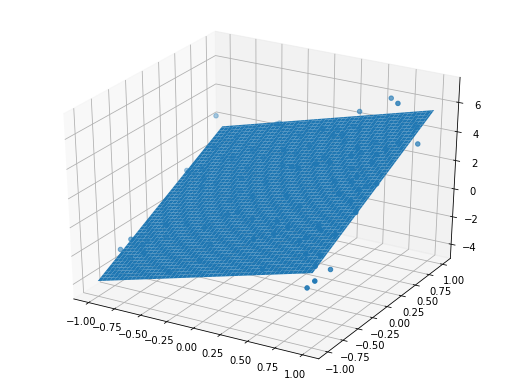

In [ ]:
import random
random.seed(777)
#data generation
x = np.random.uniform(-1, 1, 100).reshape(-1, 1)
y = np.random.uniform(-1, 1, 100).reshape(-1, 1)
z = 2*x + 3*y + 1      

noise = (np. random. normal(0,1,100)).reshape(-1,1)  #Gaussian noise 생성
z = z + noise #z에 noise 추가

H = np.array([])           #H 배열 선언
ones = np.ones_like(x)      #x와 같은 크기의 1로만 구성된 배열 생성
H = np.concatenate((x, y, ones), axis=1) #H = [x y 1] 배열로 생성, shape: (100, 3)

theta = np.linalg.inv(H.T@H)@H.T@z  # normal equation

#axis 선언
x_axis = np.linspace(-1, 1, 100).reshape(-1, 1) # x축 -1 부터 1 사이에 숫자 100개를 일정한 간격으로 생성                                
y_axis = np.linspace(-1, 1, 100).reshape(-1, 1) # y축 -1 부터 1 사이에 숫자 100개를 일정한 간격으로 생성          
xx, yy = np.meshgrid(x_axis, y_axis, sparse=True)    # 3차원 공간에 평면 그래프 출력하기 위함


plt.figure(figsize = (9,6.9)) #그래프 출력 창 크기 조절
ax = plt.subplot(1,1,1,projection = '3d') #3차원 공간에 그래프 출력
ax.scatter(x, y, z) # 산점도 그리기 

print("theta0 = {}, theta1 = {}, theta2 = {}".format(theta[0], theta[1], theta[2])) #theta  값 출력
ax.plot_surface(xx, yy, theta[0]*xx + theta[1]*yy + theta[2]) #theta 값을 활용한 평면 그래프 출력


learning_rate = 0.001: theta0 = 0.8, theta1 = 1.6, theta2 = 0.6
learning_rate = 0.01: theta0 = 1.8, theta1 = 3.2, theta2 = 0.8
learning_rate = 0.1: theta0 = 1.9, theta1 = 3.4, theta2 = 0.8
learning_rate =  1: theta0 = 1.9, theta1 = 3.4, theta2 = 0.8
learning_rate = 10: theta0 = nan, theta1 = nan, theta2 = nan


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Text(0, 0.5, 'loss values')

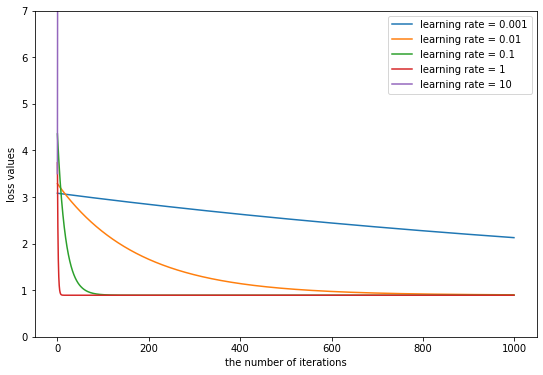

In [ ]:
import random
random.seed(777)
#data generation
x = np.random.uniform(-1, 1, 100).reshape(-1, 1)
y = np.random.uniform(-1, 1, 100).reshape(-1, 1)
z = 2*x + 3*y + 1      
noise = (np. random. normal(0,1,100)).reshape(-1,1)  #Gaussian noise 생성
z = z + noise #z에 noise 추가

num_epoch=1000  #반복 횟수
learning_rate=[0.001, 0.01, 0.1, 1, 10]  # 5가지 learning_rate 저장
iter = 5       # learning_rate 갯수 만큼 반복
loss_array = np.zeros((iter, num_epoch), dtype = float) #loss 값 저장하는 배열 선언

for i in range(iter):
  theta0 = np.random.uniform()  #theta0
  theta1 = np.random.uniform()  #theta1
  theta2 = np.random.uniform()  #theta2

  for epoch in range(num_epoch):
      z_hat = theta0 * x + theta1 * y + theta2 # 예측값

      loss = ((z_hat - z)**2).mean()  #loss 함수
      if loss < 0.00001:
          break
      
      # 미분값 적용 (Gradient)
      theta0 = theta0 - learning_rate[i] * ((z_hat - z) * x).mean() #Gradient descent 수식
      theta1 = theta1 - learning_rate[i] * ((z_hat - z) * y).mean() #Gradient descent 수식    
      theta2 = theta2 - learning_rate[i] * (z_hat - z).mean()       #Gradient descent 수식
      
      loss_array[i][epoch] = loss  #loss 값을 loss array에 저장

  #learaning rate에 따른 theta 값들 출력
  print("learning_rate = {0:2}: theta0 = {1:.1f}, theta1 = {2:.1f}, theta2 = {3:.1f}".format(learning_rate[i], theta0, theta1, theta2))

x_axis = range(num_epoch) #x축 값 지정
plt.figure(figsize=(9, 6)) #그래프 출력 창 크기 조절
plt.plot(x_axis, loss_array[0], x_axis, loss_array[1], x_axis, loss_array[2], x_axis, loss_array[3],  x_axis, loss_array[4])
plt.ylim((0, 7)) #y축 범위 설정
plt.legend(('learning rate = 0.001','learning rate = 0.01', 'learning rate = 0.1','learning rate = 1','learning rate = 10'))
plt.xlabel('the number of iterations')
plt.ylabel('loss values')

Text(0.5, 0, 'z')

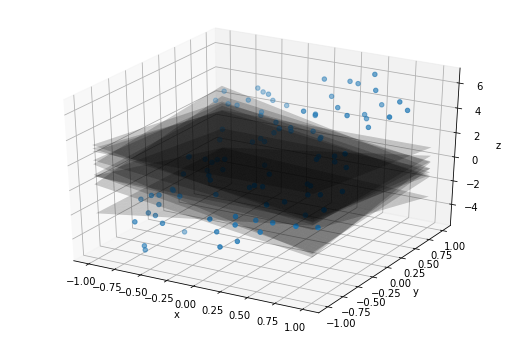

In [ ]:
import random
random.seed(777)

from scipy.stats import multivariate_normal
# scipy(사이파이): 수치해석 기능을 제공하는 파이썬 패키지
# scipy.stats: 수치해석 중 확률분포 분석을 위한 다양한 기능 제공 
# multivariate_normal : scipy.stats의 여러 기능 중 하나, 다변수 정규분포 객체를 생성함

#data generation
x = np.random.uniform(-1, 1, 100).reshape(-1, 1)
y = np.random.uniform(-1, 1, 100).reshape(-1, 1)
z = 2*x + 3*y + 1                          #f(x,y) = 2x+3y+1

noise = (np. random. normal(0,1,100)).reshape(-1,1)  #Gaussian noise 생성
z = z + noise #z에 noise 추가

cov = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) #배열 생성, cov로 공분산 행렬 받기
var = multivariate_normal(mean=[0,0,0], cov=cov) 
# 평균 벡터 mean과 공분산 행렬 cov를 가지는 다변수정규분포의 확률 밀도 함수 생성

#axis 선언
x_axis = np.linspace(-1, 1, 100).reshape(-1, 1) # x축 -1 부터 1 사이에 숫자 100개를 일정한 간격으로 생성                                
y_axis = np.linspace(-1, 1, 100).reshape(-1, 1) # y축 -1 부터 1 사이에 숫자 100개를 일정한 간격으로 생성          
xx, yy = np.meshgrid(x_axis, y_axis, sparse=True)    # 3차원 공간에 평면 그래프 출력하기 위함

fig = plt.figure(figsize=(9, 6)) #출력 그래프 그림 크기
ax = fig.add_subplot(111, projection='3d')  #3D 공간에 그래프 그리기 위함

#Sample from prior
n_samples = 10  #샘플 갯수 10개 생성- theta 
for n in range(n_samples):
  theta_0_s, theta_1_s, theta_2_s = var.rvs()  #rvs():무작위로 표본을 만들때 사용, 표본값을 무작위로 사용
  #직선 그래프 무작위로 그리기, alpha: 그래프의 투명도 설정, 0(투명)~1(불투명)
  ax.plot_surface(xx, yy, theta_0_s*xx + theta_1_s*yy + theta_2_s, color='k', alpha=0.2)  

ax.scatter(x, y, z)   # 산점도(점) 그래프 그리기

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

lambda_MAP = 1: theta0_MAP = 1.8645864365355114, theta1_MAP = 2.845964173380711, theta2_MAP = 1.1457795437326197
lambda_MAP = 4: theta0_MAP = 1.695014879444352, theta1_MAP = 2.616089049984499, theta2_MAP = 1.1201361966346624
lambda_MAP = 7: theta0_MAP = 1.552876825717419, theta1_MAP = 2.4213885353267877, theta2_MAP = 1.0949314692684229
lambda_MAP = 10: theta0_MAP = 1.432069591787259, theta1_MAP = 2.2543033847574447, theta2_MAP = 1.0703244981155637
lambda_MAP = 13: theta0_MAP = 1.3281703106166498, theta1_MAP = 2.109301314953983, theta2_MAP = 1.046409447999983


Text(0.5, 0, 'z')

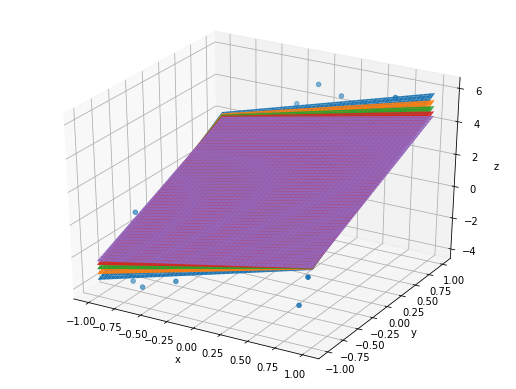

In [ ]:
## Using closed form solution
import random
random.seed(777)

#data generation
x = np.random.uniform(-1, 1, 100).reshape(-1, 1)
y = np.random.uniform(-1, 1, 100).reshape(-1, 1)
z = 2*x + 3*y + 1  

noise = (np. random. normal(0,1,100)).reshape(-1,1) #가우시안 노이즈 생성
z = z + noise #z에 noise 추가

H = np.array([])  #H 배열 선언
ones = np.ones_like(x)   #x와 같은 크기의 1로만 구성된 배열 생성
H = np.concatenate((x, y, ones), axis=1) #H = [x y 1] 배열로 생성, shape: (100, 3)

lambda_MAP = [1, 4, 7, 10, 13] #5종류의 lambda로 시도
iter = 5;  #반복 횟수 6: 0~5
theta_num = 3; #theta 갯수
I_matrix = np.identity(n=theta_num)  #3차 정방 단위행렬 생성

#axis 선언
x_axis = np.linspace(-1, 1, 100).reshape(-1, 1) # x축 -1 부터 1 사이에 숫자 100개를 일정한 간격으로 생성                                
y_axis = np.linspace(-1, 1, 100).reshape(-1, 1) # y축 -1 부터 1 사이에 숫자 100개를 일정한 간격으로 생성          
xx, yy = np.meshgrid(x_axis, y_axis, sparse=True)    # 3차원 공간에 평면 그래프 출력하기 위함

plt.figure(figsize = (9,6.9))  #그래프 출력 창 크기 조절
ax = plt.subplot(1,1,1,projection = '3d') #3차원 공간에 그래프 출력
ax.scatter(x, y, z)  # 산점도(점) 그래프 그리기, generated training data

theta_MAP = np.zeros((iter, theta_num)) 

for i in range(iter): # 6번 반복하면서 6개 평면 그래프 출력
  theta_MAP[i] = (np.linalg.inv(H.T@H + lambda_MAP[i]*I_matrix)@H.T@z).reshape(1,theta_num)  # normal equation
  print("lambda_MAP = {}: theta0_MAP = {}, theta1_MAP = {}, theta2_MAP = {}".format(lambda_MAP[i], theta_MAP[i][0], theta_MAP[i][1], theta_MAP[i][2]))
  ax.plot_surface(xx, yy, theta_MAP[i][0]*xx + theta_MAP[i][1]*yy + theta_MAP[i][2])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

lambda_GD = 1: theta0_GD = [1.85291448], theta1_GD = [3.10986356], theta2_GD = [0.93165144]
lambda_GD = 4: theta0_GD = [1.67754468], theta1_GD = [2.69803363], theta2_GD = [0.90343895]
lambda_GD = 7: theta0_GD = [1.52833866], theta1_GD = [2.38583737], theta2_GD = [0.87351994]
lambda_GD = 10: theta0_GD = [1.40161112], theta1_GD = [2.14020062], theta2_GD = [0.84341469]
lambda_GD = 13: theta0_GD = [1.29334659], theta1_GD = [1.94148883], theta2_GD = [0.81393788]


Text(0.5, 0, 'z')

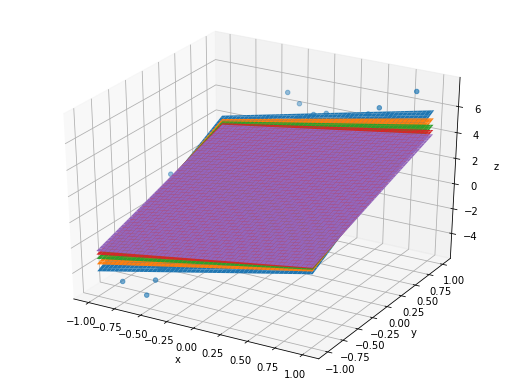

In [ ]:
## Using gradient descent

import random
random.seed(777)
#data generation
x = np.random.uniform(-1, 1, 100).reshape(-1, 1)
y = np.random.uniform(-1, 1, 100).reshape(-1, 1)
z = 2*x + 3*y + 1  

noise = (np. random. normal(0,1,100)).reshape(-1,1) #가우시안 노이즈 생성
z = z + noise #z에 noise 추가

lambda_GD =  [1, 4, 7, 10, 13] #5종류의 lambda로 시도

num_epoch = 100000  #반복 횟수
learning_rate = 0.01
iter = 5   #반복 횟수 6: 0~5
loss_array = np.zeros((iter, num_epoch), dtype = float)

#axis 선언
x_axis = np.linspace(-1, 1, 100).reshape(-1, 1) # x축 -1 부터 1 사이에 숫자 100개를 일정한 간격으로 생성                                
y_axis = np.linspace(-1, 1, 100).reshape(-1, 1) # y축 -1 부터 1 사이에 숫자 100개를 일정한 간격으로 생성          
xx, yy = np.meshgrid(x_axis, y_axis, sparse=True)    # 3차원 공간에 평면 그래프 출력하기 위함

plt.figure(figsize = (9,6.9))  #그래프 출력 창 크기 조절
ax = plt.subplot(1,1,1,projection = '3d') #3차원 공간에 그래프 출력
ax.scatter(x, y, z)  # 산점도(점) 그래프 그리기, generated training data

for i in range(iter):
  theta0_GD = np.random.uniform()  #theta0
  theta1_GD = np.random.uniform()  #theta1
  theta2_GD = np.random.uniform()  #theta2

  for epoch in range(num_epoch):
      
      z_hat = theta0_GD * x + theta1_GD * y + theta2_GD # 예측값
      theta_GD = [theta0_GD, theta1_GD, theta2_GD]

      loss = 0.5*sum((z_hat - z)**2) + lambda_GD[i]*np.linalg.norm(theta_GD) #loss 함수
      if loss < 0.00001:
          break
      
      # 미분값 적용 (Gradient)
      theta0_GD = theta0_GD - learning_rate * (sum((z_hat - z) * x) + 2*lambda_GD[i]*theta0_GD)  #Gradient descent 수식
      theta1_GD = theta1_GD - learning_rate * (sum((z_hat - z) * y) + 2*lambda_GD[i]*theta1_GD)  #Gradient descent 수식    
      theta2_GD = theta2_GD - learning_rate * (sum(z_hat - z) + 2*lambda_GD[i]*theta2_GD)        #Gradient descent 수식
      
  print("lambda_GD = {}: theta0_GD = {}, theta1_GD = {}, theta2_GD = {}".format(lambda_GD[i], theta0_GD, theta1_GD, theta2_GD))
  ax.plot_surface(xx, yy, theta0_GD*xx + theta1_GD*yy + theta2_GD)   #2차원 평면 출력

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")